## 2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara <br>bisnis untuk digunakan sebagai fitur clustering. Lakukan <br>feature engineering! (20 poin)

Langkah-langkah:
<br>a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur
clustering. Tulis alasan teman-teman memilih fitur tersebut.
<br>b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).
Untuk mempermudah kamu, yuk lihat resource di bawah ini:

- Topic Machine Learning Preparation - Feature Engineering

## A. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

## Hasil analisa Part 1 :

Dari heatmap di part 1, kita dapat melihat bahwa terdapat beberapa fitur yang memiliki korelasi yang sangat tinggi antara satu sama lain. Oleh karena itu, kita perlu Drop fitur yang redundant dan mempertahankan yang paling representatif, karena saya merasa fitur BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, dan FLIGHT_COUNT memiliki korelasi yang tinggi antara satu dan lainnya jadi saya mempertahankan SEG_KM_SUM karena fitur tersebut merupakan total jarak terbang. Selain itu fitur kategorikal bersifat geografis dan kurang representatif untuk dilakukan clustering sehingga saya memutuskan untuk Drop semua termasuk Gender karena tidak representatif. selanjutnya saya juga akan mempertahankan FLIGHT_COUNT karena fitur tersebut frekuensi terbang dan pada EDA juga menghasilkan informasi yang menarik, Selanjutnya juga AVG_Interval karena merupakan rata-rata jarak waktu antar penerbangan, saya juga akan mempertahankan EXCHANGE_COUNT karena fitur tersebut merupakan jumlah penukaran yang dilakukan oleh customer, dan terakhir saya akan melakukan Feature Engineering pada LOAD_TIME dan LAST_FLIGHT_DATE yang diharapkan dapat mengetahui apakah customer tersebut masih aktif atau tidak. Jika dijabarkan menjadi seperti ini :

- Frekuensi penerbangan (FLIGHT_COUNT) → Mengukur intensitas penerbangan.

- Total jarak (SEG_KM_SUM) → Menggambarkan total jarak penerbangan.

- Pola kebiasaan terbang (AVG_INTERVAL) →  rutin atau tidak user terbang (misalnya tiap bulan).

- Sensitivitas harga (avg_discount) → Apakah lebih suka tiket diskon atau tidak masalah harga tinggi.

- Perilaku penukaran poin (EXCHANGE_COUNT) → Apakah aktif menggunakan loyalty points atau jarang dipakai.

- Recency (LOAD_TIME - LAST_FLIGHT_DATE) → Apakah pelanggan masih aktif atau sudah lama tidak terbang.

---

Dengan 6 fitur ini saya berharap dapat membentuk segmen seperti berikut :

### 1. Frequent Flyers Premium

Ciri: Frekuensi tinggi, jarak jauh (internasional), interval singkat (rutin), tidak terlalu sensitif harga, aktif pakai poin.

Interpretasi bisnis: Pelanggan paling loyal & menguntungkan, biasanya eksekutif atau corporate traveler.

Strategi: Tawarkan lounge access, prioritas boarding, corporate deals.

### 2. Budget Leisure Travelers

Ciri: Frekuensi sedang, jarak dekat–menengah, interval tidak menentu (musiman/liburan), sangat sensitif harga (avg_discount tinggi), jarang pakai poin.

Interpretasi bisnis: Segmentasi wisatawan yang beli tiket saat promo.

Strategi: Tawarkan flash sale, paket liburan, bundling hotel + tiket.

### 3. Occasional High-Spenders

Ciri: Frekuensi rendah, tapi jarak jauh (internasional), tidak terlalu peduli harga, kadang menukar poin.

Interpretasi bisnis: Traveler kelas menengah atas yang hanya terbang saat ada acara penting (liburan keluarga, haji/umroh, konferensi).

Strategi: Tawarkan promo kelas bisnis, upgrade sekali-sekali.

### 4. Dormant Members

Ciri: Sudah lama tidak terbang (recency tinggi), frekuensi rendah, tidak pernah pakai poin.

Interpretasi bisnis: Customer “tidur”, ada di database tapi tidak aktif.

Strategi: Lakukan kampanye re-activation (email, voucher “welcome back”).

### 5. Routine Domestic Travelers

Ciri: Frekuensi tinggi, jarak dekat (domestik), interval singkat (misalnya pekerja antar-kota), sangat peduli diskon.

Interpretasi bisnis: Mereka sering terbang tapi profit tipis (karena diskon).

Strategi: Dorong upselling (priority boarding, bagasi tambahan, keanggotaan premium).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'flight_cleaned.csv')

In [4]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58255 entries, 0 to 58254
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  float64
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   57860 non-null  object 
 16  LAST_TO_END        582

In [6]:
# buat fitur baru yaitu lama sejak penerbangan terakhir yaitu berapa lama LOAD_TIME (Tanggal data diambil) sampai LAST_FLIGHT_DATE (Tanggal penerbangan terakhir)
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])
df['DAYS_SINCE_LAST_FLIGHT'] = (df['LOAD_TIME'] - df['LAST_FLIGHT_DATE']).dt.days



In [8]:
df['DAYS_SINCE_LAST_FLIGHT'].head(10)

0     0.0
1    10.0
2    95.0
3     4.0
4    77.0
5     0.0
6     2.0
7    14.0
8    21.0
9     5.0
Name: DAYS_SINCE_LAST_FLIGHT, dtype: float64

In [9]:
# Drop fitur yang tidak diperlukan, kita hanya perlu fitur FLIGHT_COUNT, SEG_KM_SUM, AVG_INTERVAL, avg_discount, EXCHANGE_COUNT, dan DAYS_SINCE_LAST_FLIGHT

df = df[['FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL', 'avg_discount', 'EXCHANGE_COUNT', 'DAYS_SINCE_LAST_FLIGHT']]
# Cek apakah ada nilai yang hilang
df.isnull().sum()

FLIGHT_COUNT                0
SEG_KM_SUM                  0
AVG_INTERVAL                0
avg_discount                0
EXCHANGE_COUNT              0
DAYS_SINCE_LAST_FLIGHT    395
dtype: int64

In [10]:
# Cek apakah ada nilai yang duplikat
df.duplicated().sum()

np.int64(99)

In [11]:
# Cek apakah ada nilai yang tidak valid (misalnya negatif untuk fitur yang seharusnya positif)
print("Negative values in FLIGHT_COUNT:", (df['FLIGHT_COUNT'] < 0).sum())
print("Negative values in SEG_KM_SUM:", (df['SEG_KM_SUM'] < 0).sum())
print("Negative values in AVG_INTERVAL:", (df['AVG_INTERVAL'] < 0).sum())
print("Negative values in avg_discount:", (df['avg_discount'] < 0).sum())
print("Negative values in EXCHANGE_COUNT:", (df['EXCHANGE_COUNT'] < 0).sum())

Negative values in FLIGHT_COUNT: 0
Negative values in SEG_KM_SUM: 0
Negative values in AVG_INTERVAL: 0
Negative values in avg_discount: 0
Negative values in EXCHANGE_COUNT: 0


In [12]:
# bersihkan nilai null dan duplikat
df = df.dropna()
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57762 entries, 0 to 58254
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FLIGHT_COUNT            57762 non-null  int64  
 1   SEG_KM_SUM              57762 non-null  int64  
 2   AVG_INTERVAL            57762 non-null  float64
 3   avg_discount            57762 non-null  float64
 4   EXCHANGE_COUNT          57762 non-null  int64  
 5   DAYS_SINCE_LAST_FLIGHT  57762 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.1 MB


In [14]:
# save feature selection
df.to_csv('flight_features.csv', index=False)

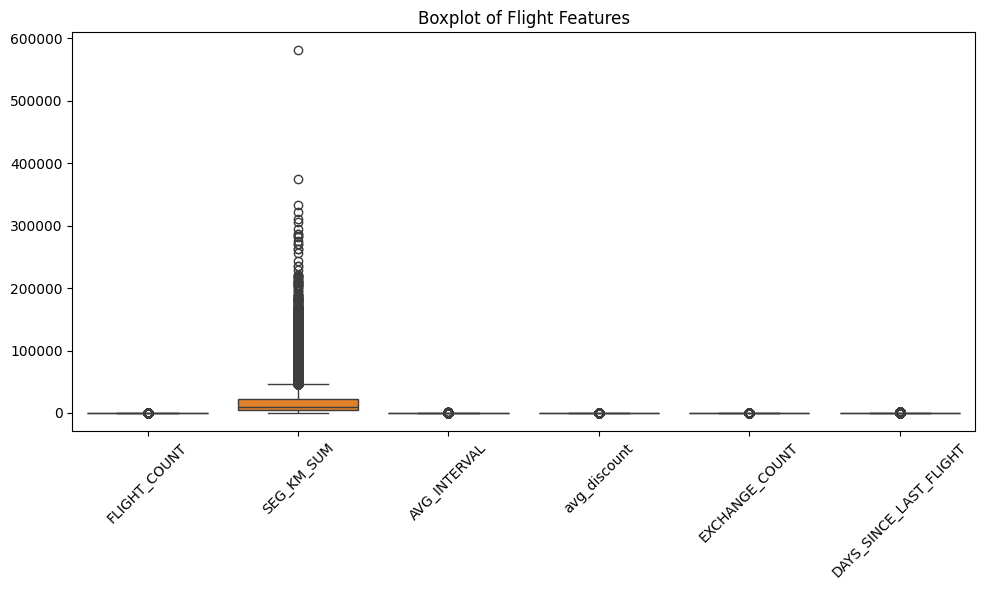

In [15]:
# plot untuk melihat jarak antar data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Flight Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

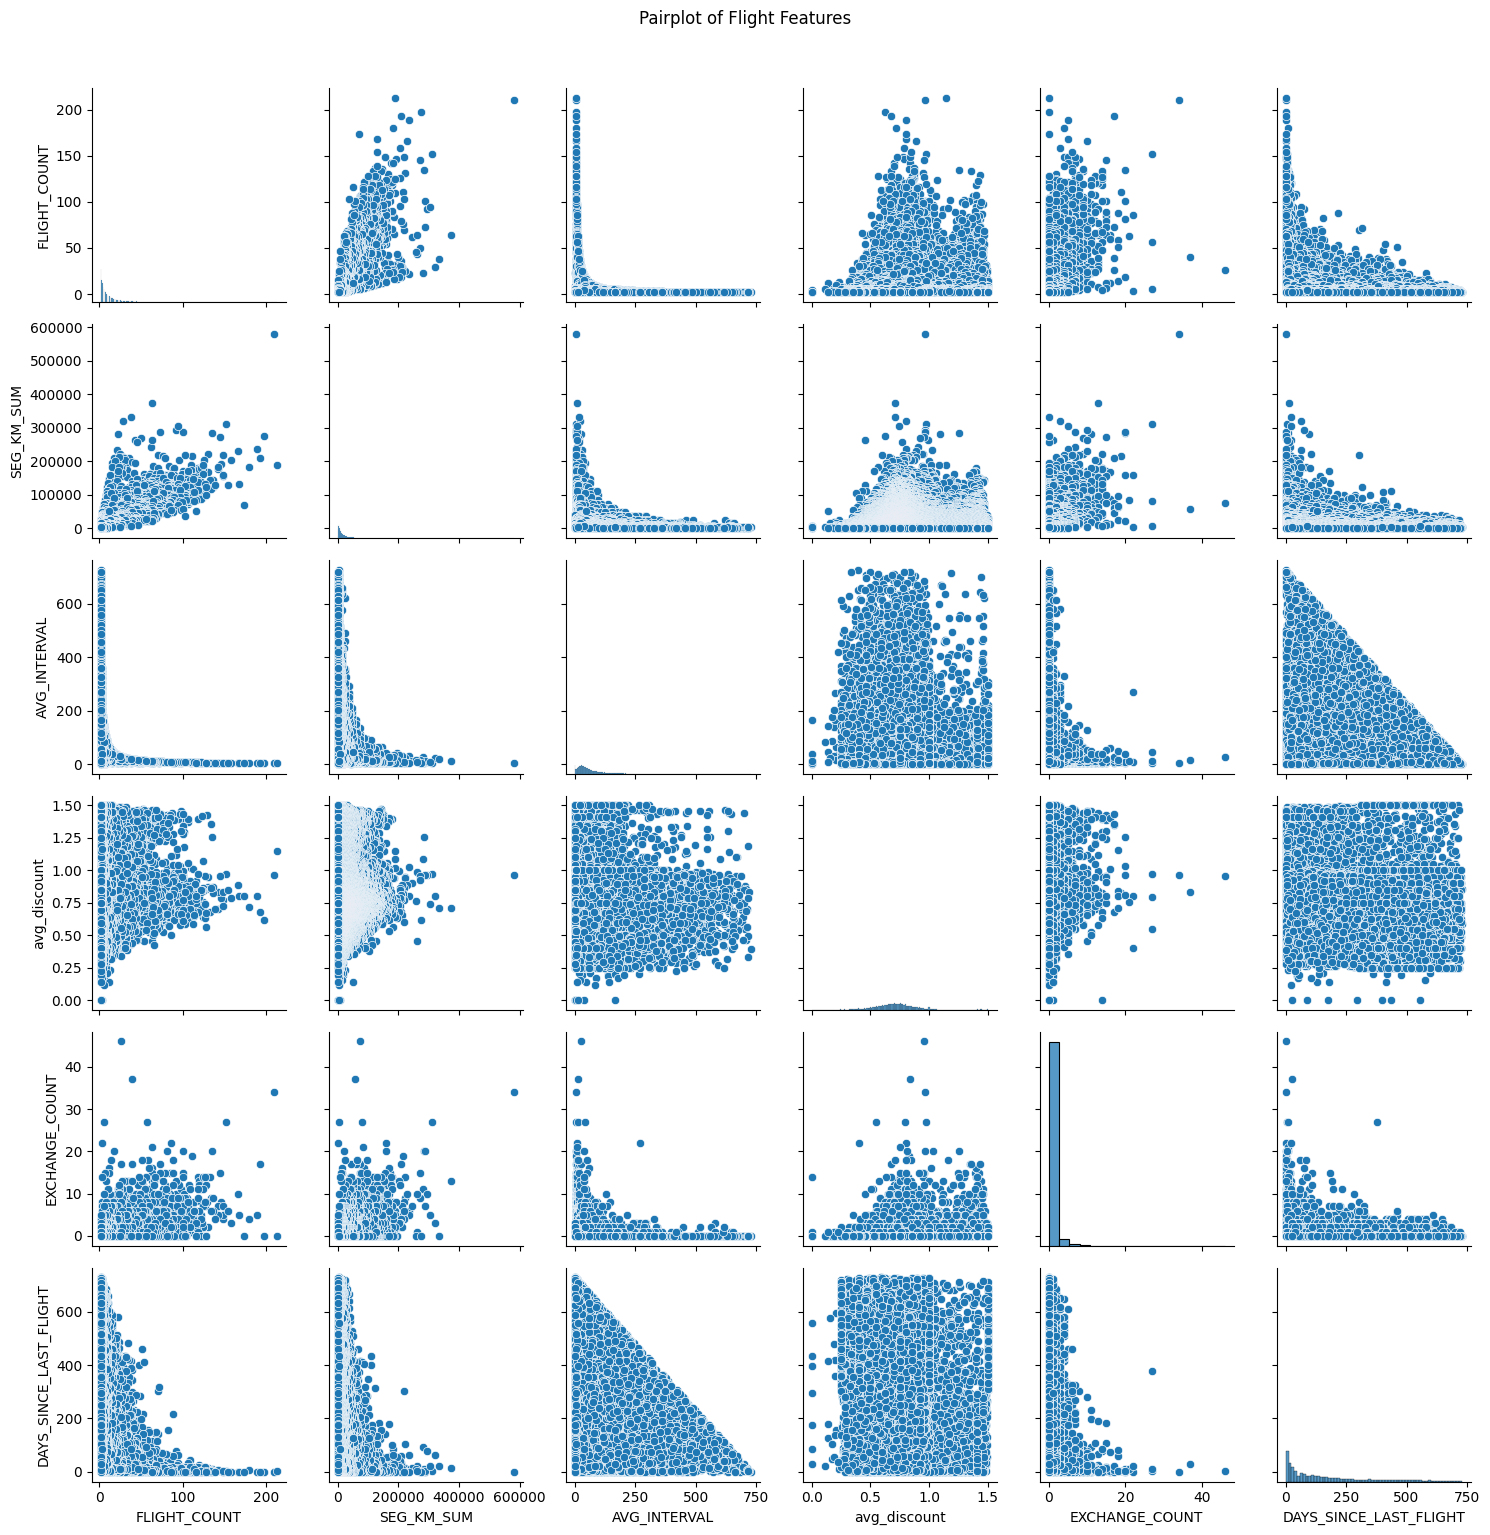

In [16]:
# Scatter plot untuk melihat hubungan antar fitur
sns.pairplot(df)
plt.suptitle('Pairplot of Flight Features', y=1.02)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ["FLIGHT_COUNT", "SEG_KM_SUM", "AVG_INTERVAL","EXCHANGE_COUNT", "DAYS_SINCE_LAST_FLIGHT"]
scaler = StandardScaler()



In [18]:
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [19]:
print(df_scaled.head())

   FLIGHT_COUNT  SEG_KM_SUM  AVG_INTERVAL  avg_discount  EXCHANGE_COUNT  \
0     13.894653   26.835732     -0.832602      0.961639       29.263047   
1      8.629945   12.688173     -0.809189      1.254676       17.095988   
2      0.767981   12.574995     -0.518139      1.090870        9.274308   
3      9.823279   13.936948     -0.815772      0.970658       23.179518   
4      5.611513   13.206099     -0.786676      0.967692        8.405232   

   DAYS_SINCE_LAST_FLIGHT  
0               -0.943527  
1               -0.888005  
2               -0.416067  
3               -0.921318  
4               -0.516006  


In [20]:
df_scaled.to_csv("flight_features_scaled.csv", index=False)

In [21]:
df_scaled.describe()

,FLIGHT_COUNT,SEG_KM_SUM,AVG_INTERVAL,avg_discount,EXCHANGE_COUNT,DAYS_SINCE_LAST_FLIGHT
count,5.776200e+04,5.776200e+04,5.776200e+04,57762.000000,5.776200e+04,5.776200e+04
mean,-7.872777e-18,7.675958e-17,1.121871e-16,0.720729,3.936389e-18,-7.872777e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,0.183910,1.000009e+00,1.000009e+00
min,-7.061367e-01,-8.086567e-01,-8.775300e-01,0.000000,-2.855242e-01,-9.435268e-01
25%,-6.359406e-01,-5.927195e-01,-5.710666e-01,0.612337,-2.855242e-01,-7.936170e-01
50%,-3.551562e-01,-3.390562e-01,-2.984719e-01,0.711564,-2.855242e-01,-3.716490e-01
75%,2.064127e-01,1.999591e-01,1.819661e-01,0.808371,-2.855242e-01,4.778394e-01
max,1.410524e+01,2.683573e+01,8.512370e+00,1.500000,3.969195e+01,3.104036e+00


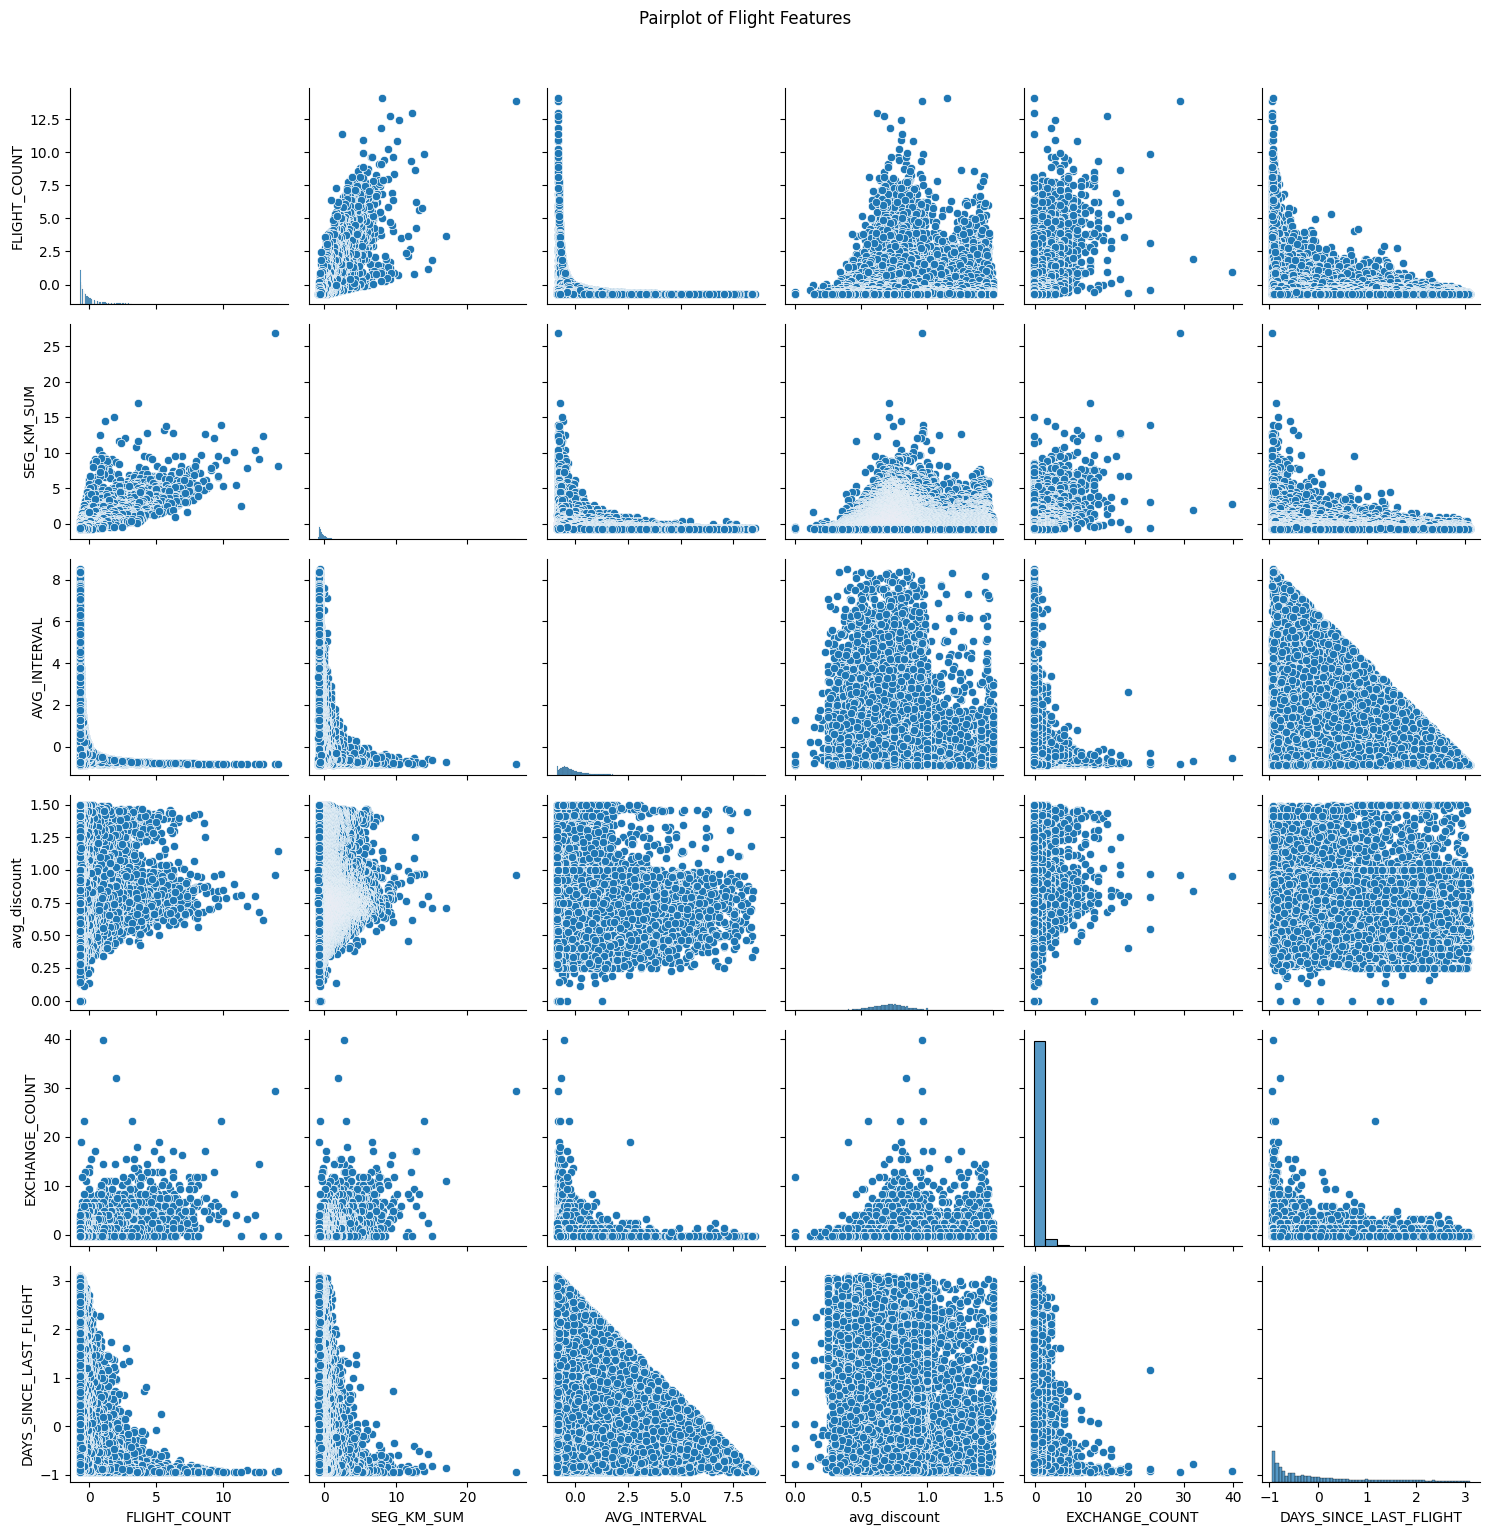

In [22]:
# Scatter plot untuk melihat hubungan antar fitur
sns.pairplot(df_scaled)
plt.suptitle('Pairplot of Flight Features', y=1.02)
plt.tight_layout()
plt.show()